<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/Heatmap_with_model_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -U kaleido

In [2]:
import joblib
import numpy as np
import pandas as pd

In [ ]:
! unzip /content/model_30_a01_norm.zip

In [4]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx',sheet_name='label_30')

In [5]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

In [6]:
feature = norm(feature)
label = norm(label)

In [7]:
array_y = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y'],axis=1)
  frame = frame.drop(['Vx','Vy'],axis=1)
  array_y.append(frame)

In [ ]:
array_y[1]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
y_test = []
for i in range(30):
  x = np.array(feature)
  y = np.array(array_y[i])
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [10]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [11]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
for i in range(192):
  a = y[...,i,0]
  b = y_predict[...,i]
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

In [12]:
error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [14]:
y_predict[...,191] == y_predict[...,5]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [15]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,-4.367468,0.151596,0.035166
std,20.888008,0.078502,0.032104
min,-224.381375,0.026906,0.001045
25%,-1.381928,0.092243,0.012838
50%,-0.070071,0.141089,0.025597
75%,0.470942,0.200154,0.046489
max,0.946350,0.384584,0.169410


In [16]:
error[error.r2 == error.r2.max()]

,r2,mae,rmse
99,0.94635,0.026906,0.001045


In [17]:
error[error.r2 == error.r2.min()]

,r2,mae,rmse
57,-224.381375,0.338265,0.128477


In [18]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

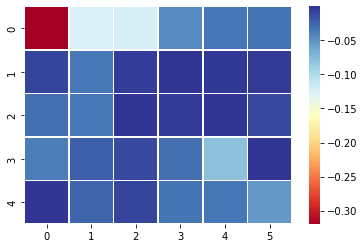

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

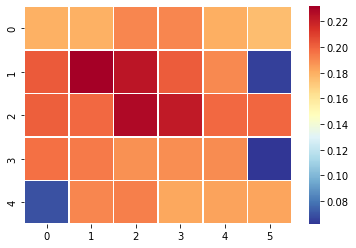

In [20]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

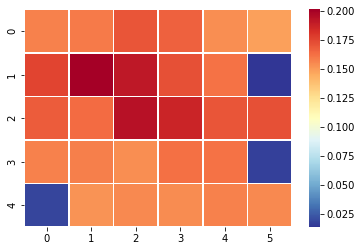

In [21]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [22]:
! mkdir subplot

In [23]:
df_koor = pd.read_excel('data_model.xlsx',sheet_name='koordinat_30')

In [24]:
def suhu(y):
  df_y = pd.DataFrame(y)
  df_z = pd.DataFrame(y)
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)
  df_y.pop('Vx')
  return df_y

In [25]:
from plotly.subplots import make_subplots
for i in range(192):
  a = y[(...,i,0)]
  b = y_predict[(...,i)]
  a = np.array(a)
  b = np.array(b)
  a = suhu(a)
  b = suhu(b)
  
  fig = make_subplots(rows=1, cols=2)

  fig.add_contour(
     z = a['suhu'].tolist(),
     x = a['koor_x'].tolist(),
     y = a['koor_y'].tolist(),
     row=1, col=1
  )

  fig.add_contour(
     z = b['suhu'].tolist(),
     x = b['koor_x'].tolist(),
     y = b['koor_y'].tolist(),
     row=1, col=2
  )
  fig.write_image(f'/content/subplot/fig {i}.png')

In [26]:
!zip -r /content/subplot.zip /content/subplot

  adding: content/subplot/ (stored 0%)
  adding: content/subplot/fig 39.png (deflated 4%)
  adding: content/subplot/fig 104.png (deflated 4%)
  adding: content/subplot/fig 172.png (deflated 5%)
  adding: content/subplot/fig 146.png (deflated 5%)
  adding: content/subplot/fig 153.png (deflated 4%)
  adding: content/subplot/fig 70.png (deflated 5%)
  adding: content/subplot/fig 32.png (deflated 4%)
  adding: content/subplot/fig 180.png (deflated 6%)
  adding: content/subplot/fig 84.png (deflated 4%)
  adding: content/subplot/fig 93.png (deflated 5%)
  adding: content/subplot/fig 189.png (deflated 5%)
  adding: content/subplot/fig 0.png (deflated 4%)
  adding: content/subplot/fig 125.png (deflated 6%)
  adding: content/subplot/fig 3.png (deflated 4%)
  adding: content/subplot/fig 137.png (deflated 6%)
  adding: content/subplot/fig 144.png (deflated 4%)
  adding: content/subplot/fig 67.png (deflated 4%)
  adding: content/subplot/fig 129.png (deflated 5%)
  adding: content/subplot/fig 135.p